In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def load_preprocessed_data(preprocessed_data_path):
    # Load preprocessed data
    preprocessed_data = pd.read_csv(preprocessed_data_path)
    return preprocessed_data

def run_kmeans(data, n_clusters):
    # Extract spectra and coordinates
    spectra = data.iloc[:, :-2].values
    coords = data.iloc[:, -2:].values

    # Standardize the data
    scaler = StandardScaler()
    spectra_normalized = scaler.fit_transform(spectra)

    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(spectra_normalized)

    return labels, coords

def visualize_clusters(labels, coords, title):
    x_coords = coords[:, 0]
    y_coords = coords[:, 1]

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x_coords, y_coords, c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

def main():
    #preprocessed_data_path = 'raw_clipped_raman_data.csv'
    preprocessed_data_path = 'preprocessed_raman_data.csv'
    n_clusters = 3  # Adjust the number of clusters as needed

    # Load preprocessed data
    data = load_preprocessed_data(preprocessed_data_path)

    # Run KMeans clustering
    labels, coords = run_kmeans(data, n_clusters)

    # Visualize the clusters
    visualize_clusters(labels, coords, 'KMeans Clustering of Raman Spectra')

if __name__ == "__main__":
    main()

Top local maxima within range (400, 1000): ['wavenumber_542', 'wavenumber_457', 'wavenumber_617', 'wavenumber_880', 'wavenumber_897']


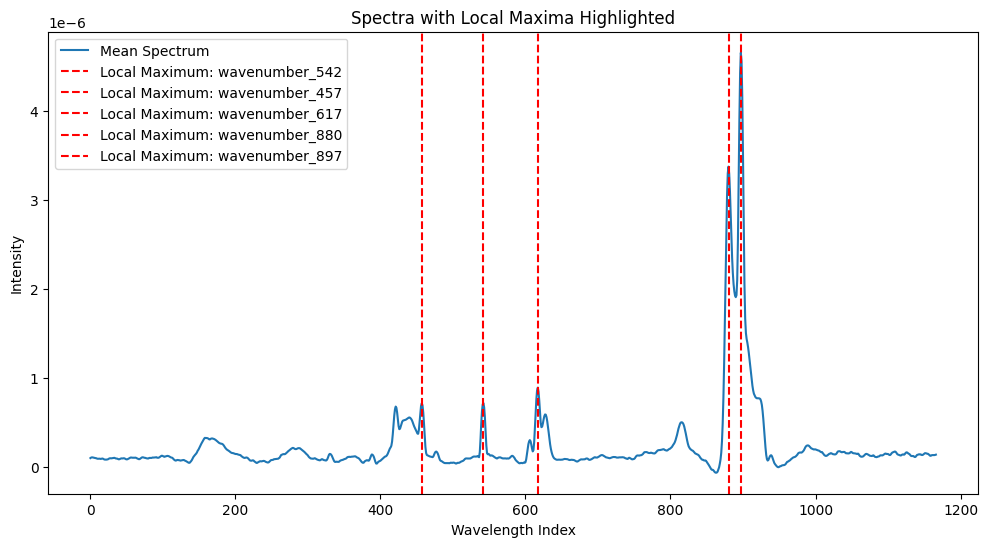

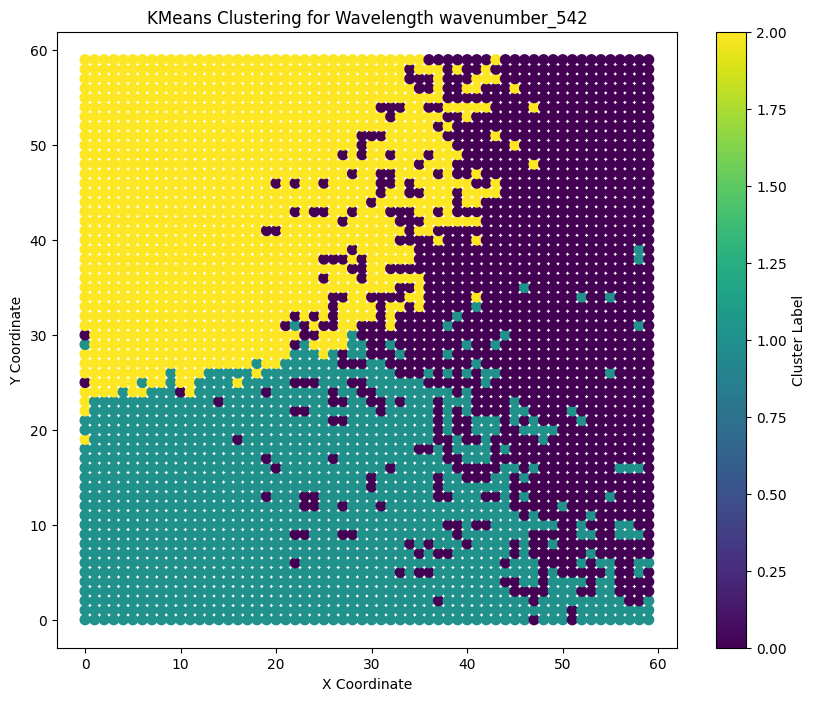

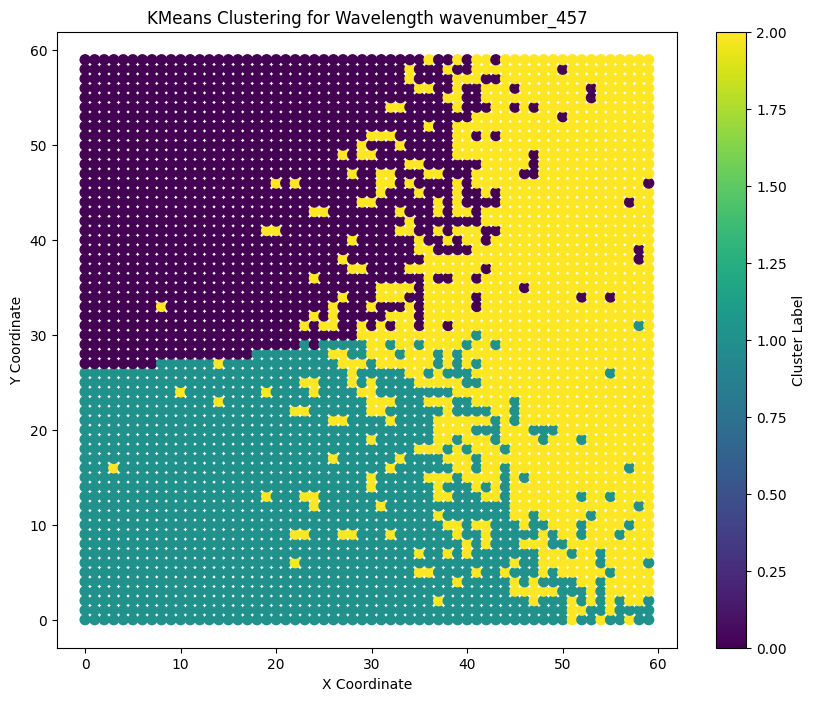

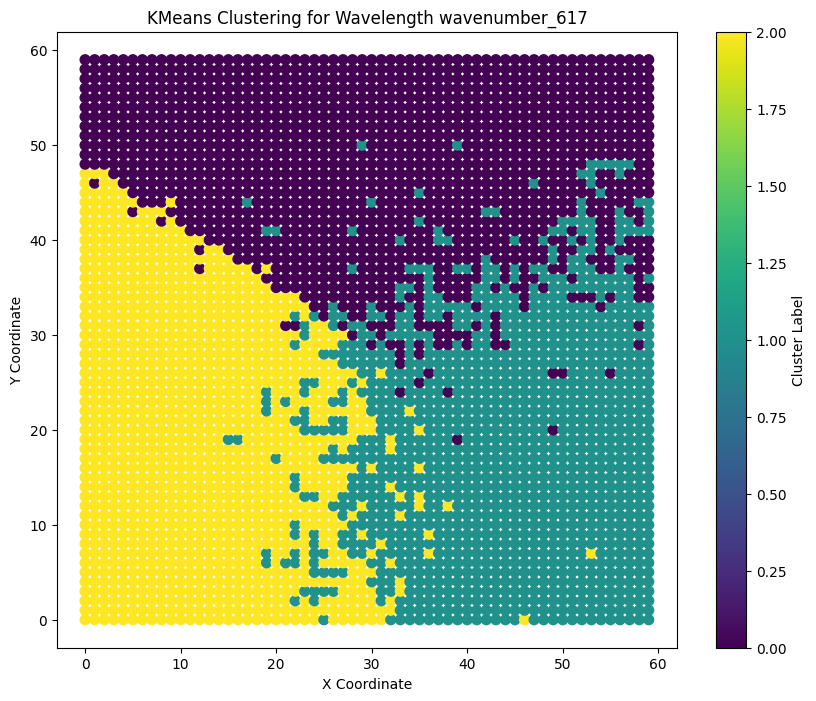

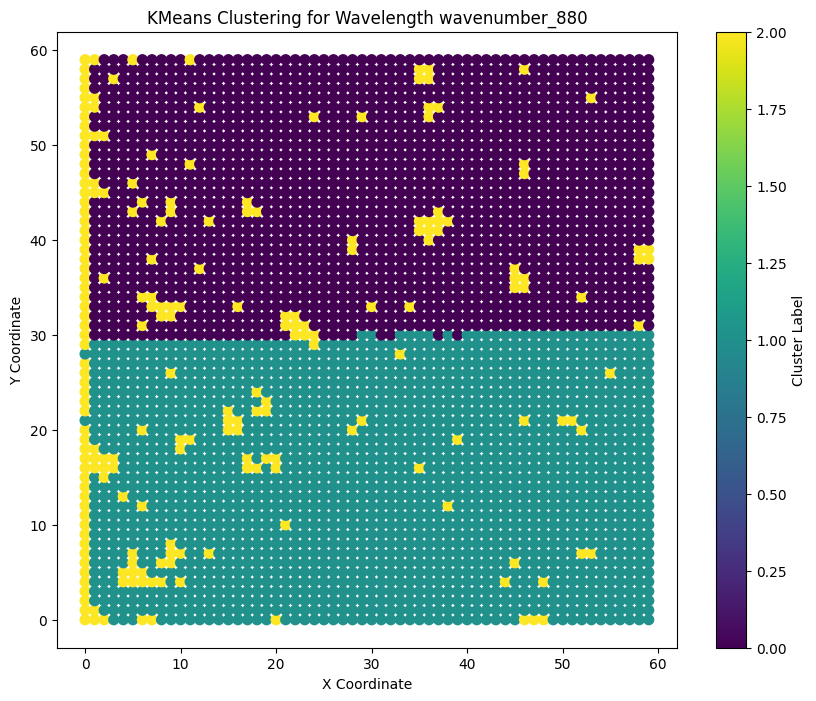

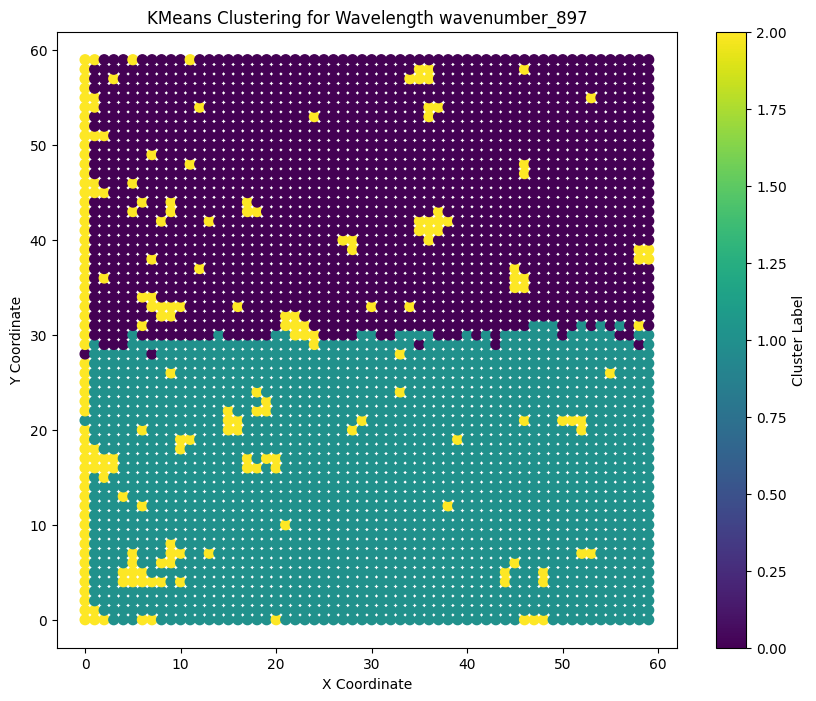

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks, peak_prominences

def load_preprocessed_data(preprocessed_data_path):
    # Load preprocessed data
    preprocessed_data = pd.read_csv(preprocessed_data_path)
    return preprocessed_data

def find_top_local_maxima(data, wavelength_range=(400, 600), n_top=5):
    # Calculate the mean spectrum
    spectral_columns = data.columns[:-2]  # Exclude the x and y columns
    mean_spectrum = data[spectral_columns].mean(axis=0).values

    # Identify local maxima within the specified range
    peaks, _ = find_peaks(mean_spectrum)
    
    # Calculate the prominences of the peaks
    prominences = peak_prominences(mean_spectrum, peaks)[0]
    
    # Filter peaks within the specified range
    filtered_peaks = [peak for peak in peaks if wavelength_range[0] <= peak <= wavelength_range[1]]
    filtered_prominences = prominences[[i for i, peak in enumerate(peaks) if wavelength_range[0] <= peak <= wavelength_range[1]]]

    # Select the top n local maxima based on prominence
    top_peaks_indices = np.argsort(filtered_prominences)[-n_top:]
    top_peaks = [filtered_peaks[i] for i in top_peaks_indices]
    
    top_columns = [spectral_columns[peak] for peak in top_peaks]
    
    return top_columns

def run_kmeans_for_wavelength(data, wavelength_column, n_clusters=3):
    # Extract the relevant columns
    selected_data = data[[wavelength_column, 'x', 'y']]
    # Standardize the data
    scaler = StandardScaler()
    selected_data_scaled = scaler.fit_transform(selected_data)
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(selected_data_scaled)
    return labels, selected_data[['x', 'y']].values

def visualize_clusters(labels, coords, title):
    x_coords = coords[:, 0]
    y_coords = coords[:, 1]
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(x_coords, y_coords, c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

def visualize_spectrum_with_local_maxima(data, local_maxima):
    spectral_columns = data.columns[:-2]  # Exclude the x and y columns
    spectra = data[spectral_columns].values
    mean_spectrum = spectra.mean(axis=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(mean_spectrum, label='Mean Spectrum')
    
    for wavelength in local_maxima:
        wavelength_index = spectral_columns.get_loc(wavelength)
        plt.axvline(x=wavelength_index, color='r', linestyle='--', label=f'Local Maximum: {wavelength}')
    
    plt.xlabel('Wavelength Index')
    plt.ylabel('Intensity')
    plt.title('Spectra with Local Maxima Highlighted')
    plt.legend()
    plt.show()

def main():
    preprocessed_data_path = 'preprocessed_raman_data.csv'
    n_clusters = 3  # Adjust the number of clusters as needed
    wavelength_range = (400, 1000)  # Specify the range for local maxima

    # Load preprocessed data
    data = load_preprocessed_data(preprocessed_data_path)

    # Find the top 10 local maxima in the specified range
    top_local_maxima = find_top_local_maxima(data, wavelength_range=wavelength_range, n_top=5)
    print(f"Top local maxima within range {wavelength_range}: {top_local_maxima}")

    # Visualize the spectrum with local maxima highlighted
    visualize_spectrum_with_local_maxima(data, top_local_maxima)

    # Run KMeans clustering for each of the top local maxima
    for wavelength in top_local_maxima:
        labels, coords = run_kmeans_for_wavelength(data, wavelength, n_clusters)
        visualize_clusters(labels, coords, f'KMeans Clustering for Wavelength {wavelength}')

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_preprocessed_data(preprocessed_data_path):
    # Load preprocessed data
    preprocessed_data = pd.read_csv(preprocessed_data_path)
    return preprocessed_data

def apply_pca(data, n_components=10):
    # Extract spectra and coordinates
    spectra = data.iloc[:, :-2].values
    coords = data.iloc[:, -2:].values

    # Standardize the data
    scaler = StandardScaler()
    spectra_normalized = scaler.fit_transform(spectra)

    # Apply PCA
    pca = PCA(n_components=n_components)
    spectra_pca = pca.fit_transform(spectra_normalized)

    return spectra_pca, coords, pca

def visualize_explained_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('Explained Variance by Principal Components')

    plt.subplot(1, 2, 2)
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.ylabel('Cumulative explained variance ratio')
    plt.xlabel('Principal components')
    plt.title('Cumulative Explained Variance by Principal Components')

    plt.tight_layout()
    plt.show()

def visualize_pca_scatter(spectra_pca, labels, coords):
    plt.figure(figsize=(10, 8))
    plt.scatter(spectra_pca[:, 0], spectra_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title('PCA Scatter Plot (First Two Principal Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

def run_kmeans(data, n_clusters):
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

def main():
    preprocessed_data_path = 'preprocessed_raman_data.csv'
    n_clusters = 2  # Adjust the number of clusters as needed
    n_pca_components = 2  # Adjust the number of PCA components as needed

    # Load preprocessed data
    data = load_preprocessed_data(preprocessed_data_path)

    # Apply PCA
    spectra_pca, coords, pca = apply_pca(data, n_components=n_pca_components)
    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained variance ratio of the first {n_pca_components} components: {explained_variance_ratio}")

    # Visualize explained variance
    visualize_explained_variance(pca)

    # Run KMeans clustering
    labels = run_kmeans(spectra_pca, n_clusters)

    # Visualize PCA scatter plot
    visualize_pca_scatter(spectra_pca, labels, coords)

    # Visualize the clusters
    visualize_clusters(labels, coords, 'KMeans Clustering with PCA')

if __name__ == "__main__":
    main()